# Final Assignment: Classification

**What is classification?** In machine learning, classification is the task of categorizing data into predefined classes or categories. It's a type of supervised learning where a model learns from labeled training data to predict the class of new, unseen data. Essentially, it's about teaching a machine to sort things into groups based on learned patterns

## 1. Load the required libraries

`caret`: Classification and Regression Training <br>
`corrplot`: Visualize correlation matrices <br>
`ggplot2`: Visualization 

In [1]:
library(caret)
library(corrplot)     
library(ggplot2) 

Loading required package: ggplot2



Loading required package: lattice




Attaching package: ‘caret’




The following object is masked from ‘package:httr’:

    progress




corrplot 0.92 loaded



## 2. Load the dataset

Our data is stored in a .csv file. We import it using `read.csv()` function and store it in a list called df.

In [2]:
df <- read.csv("/kaggle/input/data-analytics-exam/train_data.csv")

## 3. Preview and data summary

In [3]:
# Check the structure of our data frame
str(df)

'data.frame':	800 obs. of  22 variables:
 $ ID    : int  836 679 129 930 509 471 299 270 978 187 ...
 $ V1    : num  1.14 677.29 -211.44 -1614.5 593.62 ...
 $ V2    : num  2.0407 1.9246 0.0674 -1.2695 -0.8085 ...
 $ V3    : num  2.0407 1.9246 0.0674 -1.2695 -0.8085 ...
 $ V4    : int  12 12 12 12 12 12 12 12 12 12 ...
 $ V5    : chr  "\"1.25658493843886\"" "\"1.03950148489844\"" "\"0.969360903724275\"" "\"-1.44714177892836\"" ...
 $ V6    : num  1.649 1.4093 1.321 -1.1574 0.0821 ...
 $ V7    : num  1.72 0.54 1.082 -1.26 -0.396 ...
 $ V8    : num  3.372 3.293 0.931 -1.817 0.059 ...
 $ V9    : num  0.925 1.234 1.044 -1.833 -1.382 ...
 $ V10   : num  1.8725 -0.0696 0.1176 -1.0741 -0.2245 ...
 $ V11   : num  -1.496 -1.188 0.723 -0.243 -1.287 ...
 $ V12   : num  -0.0469 -0.0273 -0.5389 -1.1014 0.1935 ...
 $ V13   : num  0.0169 0.4928 -1.4947 0.7721 -1.1217 ...
 $ V14   : num  0.4815 0.666 1.0808 0.0418 0.02 ...
 $ V15   : num  -1.215 -1.433 -0.714 0.256 -0.987 ...
 $ V16   : num  0.08329 -1

In [4]:
# Observe the first 5 instances
head(df, 5)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,target
,<int>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,836,1.143459,2.0407125,2.0407125,12,"""1.25658493843886""",1.6489505,1.7200440,3.37178138,0.9247758,⋯,-0.04690121,0.01689938,0.48151973,-1.2154741,0.08328904,0.3222243,0.4665605,0.8078467,-0.6515033,C
2,679,677.290139,1.9245715,1.9245715,12,"""1.03950148489844""",1.4092986,0.5404104,3.29302737,1.2340239,⋯,-0.02732321,0.49278780,0.66601187,-1.4331175,-1.17671254,1.1687702,0.8554406,-0.9584706,0.6980888,C
3,129,-211.444696,0.0673895,0.0673895,12,"""0.969360903724275""",1.3210081,1.0821632,0.93140315,1.0437145,⋯,-0.53885947,-1.49474026,1.08076635,-0.7142028,0.71756283,-1.3530586,1.3642579,0.8488479,-0.1685633,B
4,930,-1614.495099,-1.2695371,-1.2695371,12,"""-1.44714177892836""",-1.1573636,-1.2598247,-1.81721030,-1.8331575,⋯,-1.10139013,0.77209203,0.04184372,0.2557867,1.59295319,1.2959807,0.5438155,-0.9782200,-0.2554242,A
5,509,593.617220,-0.8084618,-0.8084618,12,"""0.403527646302114""",0.0820589,-0.3956185,0.05903553,-1.3823648,⋯,0.19354402,-1.12166885,0.02002768,-0.9865844,-0.00265581,-1.4021331,-0.7746178,-0.4196050,1.3054071,A


In [5]:
# 5-numbers summary of all the numerical columns
summary(df)

       ID              V1                V2                V3         
 Min.   :  1.0   Min.   :-3666.8   Min.   :-3.8407   Min.   :-3.8407  
 1st Qu.:260.8   1st Qu.: -904.8   1st Qu.:-0.7011   1st Qu.:-0.7011  
 Median :505.0   Median :  140.2   Median : 0.1989   Median : 0.1989  
 Mean   :503.3   Mean   :  123.7   Mean   : 0.1649   Mean   : 0.1649  
 3rd Qu.:751.2   3rd Qu.: 1117.3   3rd Qu.: 1.0581   3rd Qu.: 1.0581  
 Max.   :999.0   Max.   : 3912.0   Max.   : 3.3089   Max.   : 3.3089  
       V4          V5                  V6                V7         
 Min.   :12   Length:800         Min.   :-3.1912   Min.   :-3.3967  
 1st Qu.:12   Class :character   1st Qu.:-0.6777   1st Qu.:-0.7673  
 Median :12   Mode  :character   Median : 0.2444   Median : 0.1780  
 Mean   :12                      Mean   : 0.2055   Mean   : 0.1505  
 3rd Qu.:12                      3rd Qu.: 1.1326   3rd Qu.: 1.0551  
 Max.   :12                      Max.   : 4.1188   Max.   : 4.2707  
       V8           

`is.na()` function returns TRUE if it finds na values. By passing it to the `sum()` function, we calculate the number of na values in our dataset.

In [6]:
cat("The dataset has", sum(is.na(df)), "NA values.\n")

The dataset has 0 NA values.


### 3.1 Convert V5 to numeric

The `gsub()` or the Global Substitution function, replaces all matches of a pattern in a string (vectorized over input).

In [7]:
df$V5 <- as.numeric(gsub('"', '', df$V5))

### 3.2 Drop V4 due to zero variance

A zero variance column contain the same value for all rows and it does not help us.

In [8]:
df <- subset(df, select = -V4)

### 3.3 Check for correlation and remove highly correlated ones

First we compute the correlation matrix using `cor()` function. Then using `corrplot.mixed()` functinon we plot it with AOE (Angles ordered by eigenvectors).

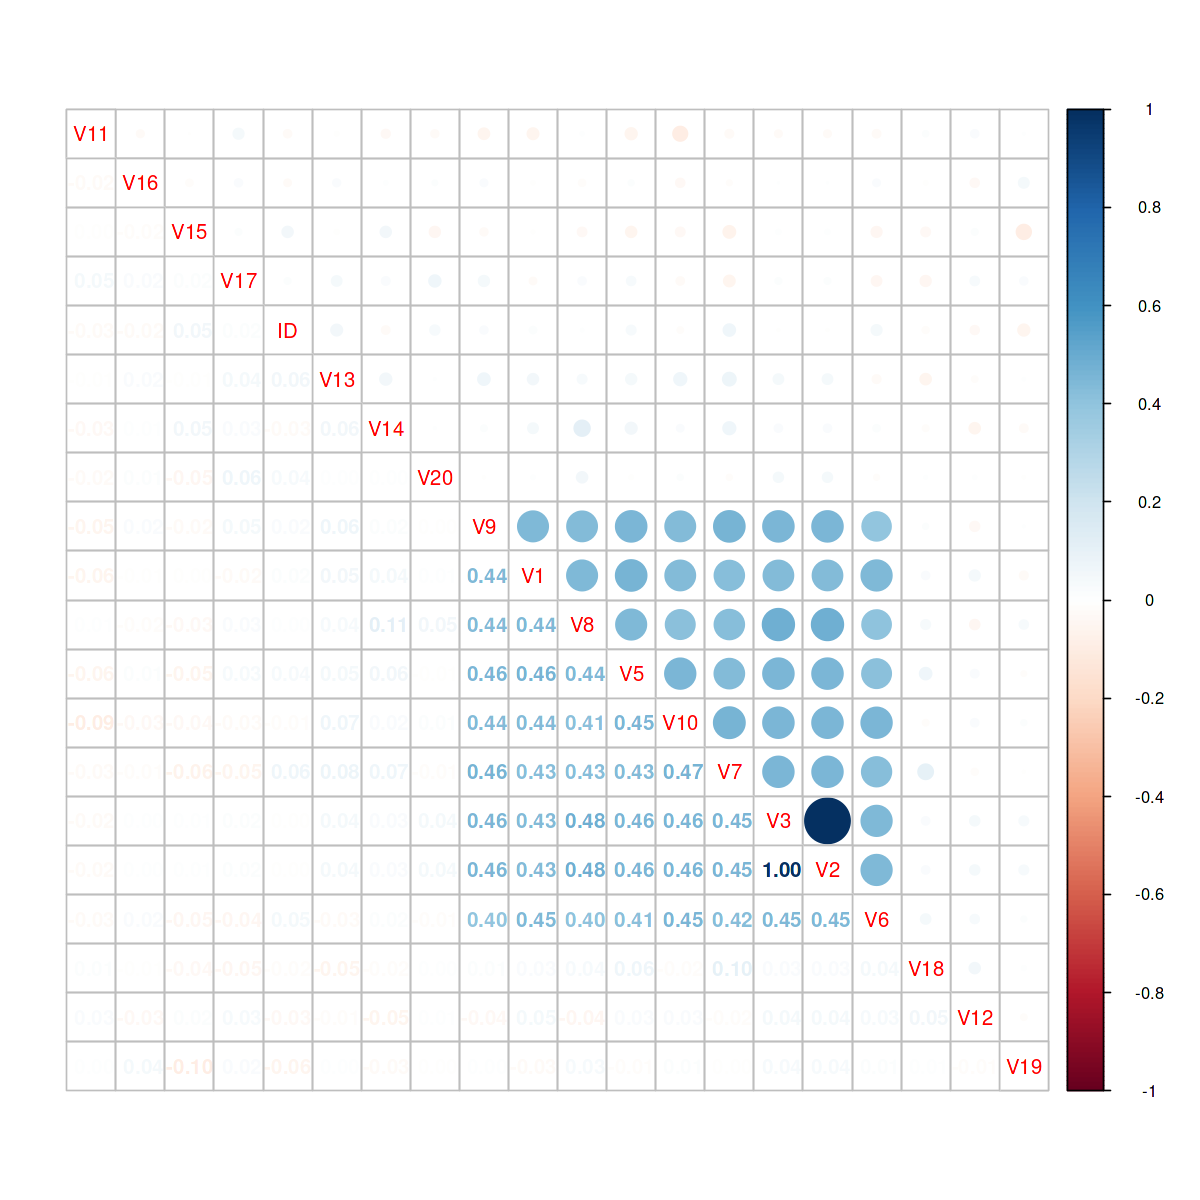

In [9]:
options(repr.plot.width = 10, repr.plot.height = 10)
cor_matrix <- cor(df[, 1:20])
corrplot.mixed(cor_matrix, order = 'AOE')

Then we set a cutoff point and identify variables with correlation > 0.9. Finally we simply drop the redundant columns. 

In [10]:
correlated_idx <- findCorrelation(cor_matrix, cutoff = 0.9)

if (length(correlated_idx) > 0) {
  cat("Removing correlated variables:", colnames(cor_matrix)[correlated_idx], "\n")
  df <- df[, -correlated_idx]
}

Removing correlated variables: V2 


## 4. Train-test split

Using the `caret` package, we split our data into train and test set. We randomly group 80% as train and 20% as test.

In [11]:
set.seed(42)
train_idx <- createDataPartition(df$target, p = 0.80, list = FALSE)
train <- df[train_idx, ]
test  <- df[-train_idx, ]

## 5. Prepare the data

Then we select features and targets for model training and testing.

In [12]:
x_train <- train[, 2:19]
y_train <- as.factor(train$target)

x_test  <- test[, 2:19]
y_test  <- as.factor(test$target)

## 6. Perform Classification Algorithms

To perform the models, first I use the repeated cross validation to reduce the variability from a single CV run by averaging results across repeats. This helps us have more stable performance estimates.

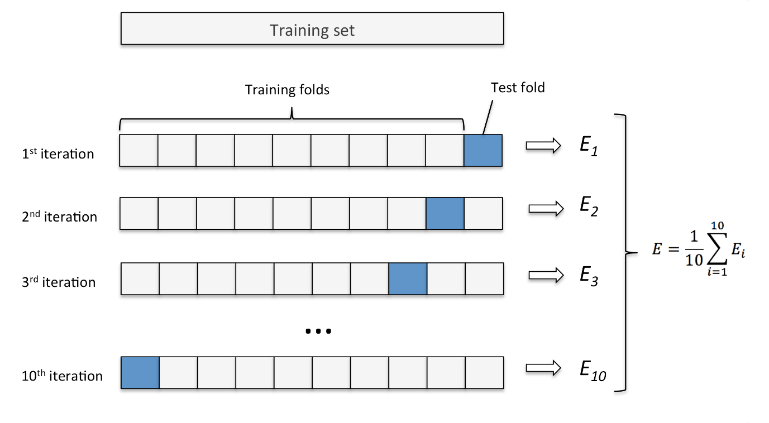

`classProbs = TRUE` enables metrics like AUC for classification.

`SavePredictions = "final"` saves predictions on held-out folds for detailed analysis.


In [13]:
set.seed(42)
ctrl <- trainControl(
  method = "repeatedcv", 
  number = 5, # 5 folds per CV
  repeats = 3, # Repeat CV 3 times
  classProbs = TRUE, # Compute class probabilities for classification
  savePredictions = "final" # Save final hold-out predictions for model evaluation
)

### 6.1 Multinomial Logistic Regression

Used for classification when the **target has more than two classes**. It models the **log-odds** of each class relative to a reference class.

$$
\log\left(\frac{P(Y = k)}{P(Y = K)}\right) = \beta_{k0} + \beta_{k1}x_1 + \beta_{k2}x_2 + \cdots + \beta_{kp}x_p
$$

- $Y$: target variable with $K$ classes  
- $ x_1, \dots, x_p$: input features  
- $K$: reference class  
- Each class $K$ has its


In [14]:
model_log <- train(x = x_train,
                   y = y_train,
                   method = "multinom",
                   trace = FALSE, # Suppresses training output
                   trControl = ctrl) # Resampling setting from trainControl()

### 6.2 Linear Discriminant Analysis

LDA is a classification method that projects data onto a lower-dimensional space to **maximize class separation**. It assumes classes are normally distributed with **equal covariance**.

$$
\delta_k(x) = x^\top \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^\top \Sigma^{-1} \mu_k + \log(\pi_k)
$$

Where:
- $\mu_k$: mean vector of class $k$  
- $\Sigma$: shared covariance matrix  
- $\pi_k$: prior probability of class $k$  
- $x$: input feature vector  

The predicted class is the one with the **highest** $\delta_k(x)$.

In [15]:
model_lda <- train(x = x_train, y = y_train, method = "lda", trControl = ctrl)

### 6.3 Quadratic Discriminant Analysis
QDA is a classification method similar to LDA, but **allows each class to have its own covariance matrix**. This results in **non-linear (quadratic) decision boundaries**.

$$
\delta_k(x) = -\frac{1}{2} \log|\Sigma_k| - \frac{1}{2}(x - \mu_k)^\top \Sigma_k^{-1}(x - \mu_k) + \log(\pi_k)
$$

Where:
- $\mu_k$: mean vector of class $k$  
- $\Sigma_k$: covariance matrix of class $k$  
- $\pi_k$: prior probability of class $k$  
- $x$: input feature vector  

The predicted class is the one with the **highest** $\delta_k(x)$.

In [16]:
model_qda <- train(x = x_train, y = y_train, method = "qda", trControl = ctrl)

### 6.4 Naive Bayes

Naive Bayes is a **probabilistic classifier** based on Bayes' Theorem with the **assumption of feature independence** given the class. It's fast and works well with high-dimensional data.

$$
\hat{y} = \arg\max_k \; P(Y = k) \prod_{j=1}^{p} P(x_j \mid Y = k)
$$

Where:
- $Y$: class variable  
- $x_j$: value of feature $j$  
- $p$: number of features  
- $P(Y = k)$: prior probability of class $k$  
- $P(x_j \mid Y = k)$: likelihood of feature $j$ given class $k$  

The class with the highest posterior probability is predicted.

In [17]:
suppressWarnings({
  model_nb <- train(x = x_train, y = y_train, method = "nb", trControl = ctrl)
})


### 6.5 K-Nearest Neighbors (k = 5)

KNN is a **non-parametric**, instance-based learning algorithm. It classifies a new point based on the **majority class among its $k$ closest neighbors** in the training data.

$$
\hat{y} = \arg\max_{c} \sum_{i \in \mathcal{N}_k(x)} \mathbb{1}(y_i = c)
$$

Where:
- $\mathcal{N}_k(x)$: the set of $k$ nearest neighbors of input $x$  
- $y_i$: the class label of neighbor $i$  
- $\mathbb{1}(\cdot)$: indicator function (1 if true, 0 otherwise)  
- $c$: class label  

The predicted class is the one **most frequent among the neighbors**.

In [18]:
model_knn <- train(x = x_train, y = y_train, method = "knn",
                   tuneGrid = data.frame(k = 5), preProcess = c("center", "scale"))

### 6.6 Random Forest

Random Forest is an ensemble learning method that builds many **decision trees** using random subsets of data and features, then combines their predictions to improve accuracy and reduce overfitting.

$$
\hat{y} = \text{majority\_vote} \big\{ h_1(x), h_2(x), \dots, h_B(x) \big\}
$$

Where:
- $h_b(x)$: prediction of the $b$-th decision tree  
- $B$: total number of trees  
- $\hat{y}$: final predicted class via majority vote  

Each tree is trained on a bootstrap sample and considers a random subset of features at each split.

In [19]:
model_rf <- train(
  x = x_train, y = y_train,
  method = "rf",
  tuneGrid = data.frame(mtry = floor(sqrt(ncol(x_train)))), # Number of vars tried each split
  trControl = ctrl,  # optional tuning control
  ntree = 100 # number of trees in forest
)

Now let's report resampling based on predictions made on the internal validation folds that the model never trianed on. These are "out-of-sample" predictions collected during cross-validation. This approach estimates how well the model would perform on new, unseen data, even though it does not use a separate test set.


Call:
summary.resamples(object = resamps)

Models: LOG, LDA, RF 
Number of resamples: 15 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LOG 0.7795276 0.7937863 0.8139535 0.8161749 0.8320312 0.8759690    0
LDA 0.7559055 0.8015686 0.8217054 0.8177369 0.8398438 0.8604651    0
RF  0.7692308 0.7859738 0.8046875 0.8131657 0.8256010 0.9218750    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LOG 0.6695474 0.6901367 0.7210811 0.7238154 0.7474374 0.8134490    0
LDA 0.6322623 0.7022231 0.7316875 0.7261617 0.7594958 0.7901302    0
RF  0.6528705 0.6779121 0.7058553 0.7189221 0.7376878 0.8825904    0


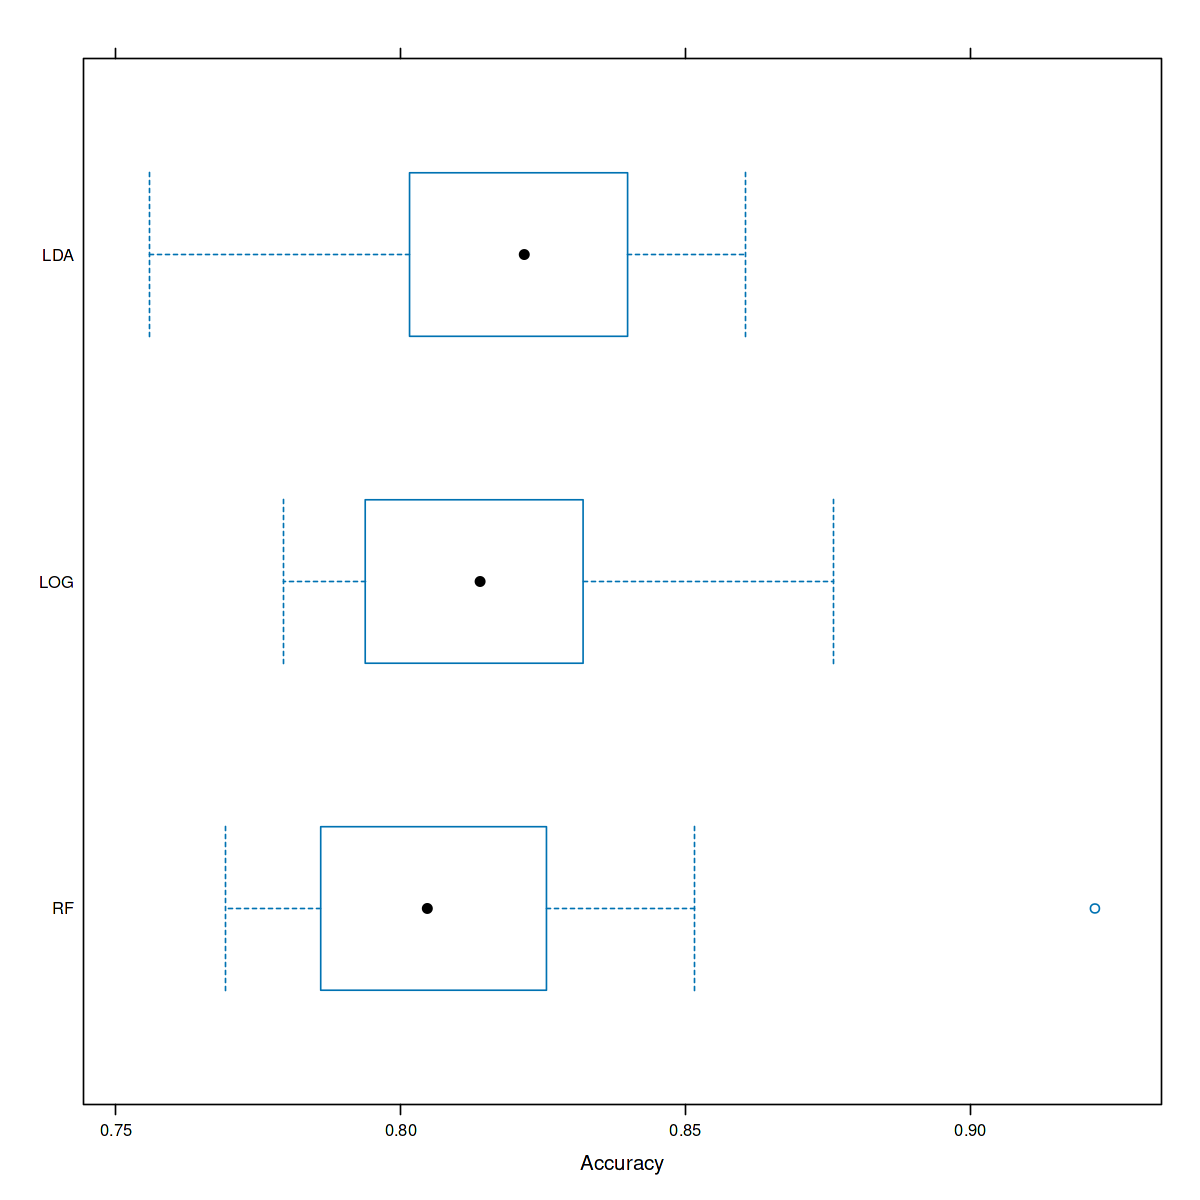

In [20]:
resamps <- resamples(list(LOG = model_log, LDA = model_lda, RF = model_rf))
summary(resamps)
bwplot(resamps, metric = "Accuracy")

## 7. Predict on x_test_split

Then we perform our models on the test sets, and store them in appropriate variables.

In [21]:
suppressWarnings({
    pred_log <- predict(model_log, x_test)
    pred_lda <- predict(model_lda, x_test)
    pred_qda <- predict(model_qda, x_test)
    pred_nb  <- predict(model_nb, x_test)
    pred_knn <- predict(model_knn, x_test)
    pred_rf  <- predict(model_rf, x_test)
})

## 8. Compare error rates using y-test

In [22]:
error_rate <- function(true, pred) {
  mean(true != pred)
}

In [23]:
# Build results data frame
model_names <- c("Multinomial Logistic Regression", "LDA", "QDA", "Naive Bayes", "k-NN", "Random Forest")
predictions <- list(pred_log, pred_lda, pred_qda, pred_nb, pred_knn, pred_rf)

results <- data.frame(
  Model = model_names,
  ErrorRate = sapply(predictions, function(pred) error_rate(y_test, pred))
)

print(results)

                            Model ErrorRate
1 Multinomial Logistic Regression 0.1265823
2                             LDA 0.1329114
3                             QDA 0.3417722
4                     Naive Bayes 0.1582278
5                            k-NN 0.2531646
6                   Random Forest 0.1139241


We can see that although LDA performed better on train data, now Random Forest is performing better on the test split data.

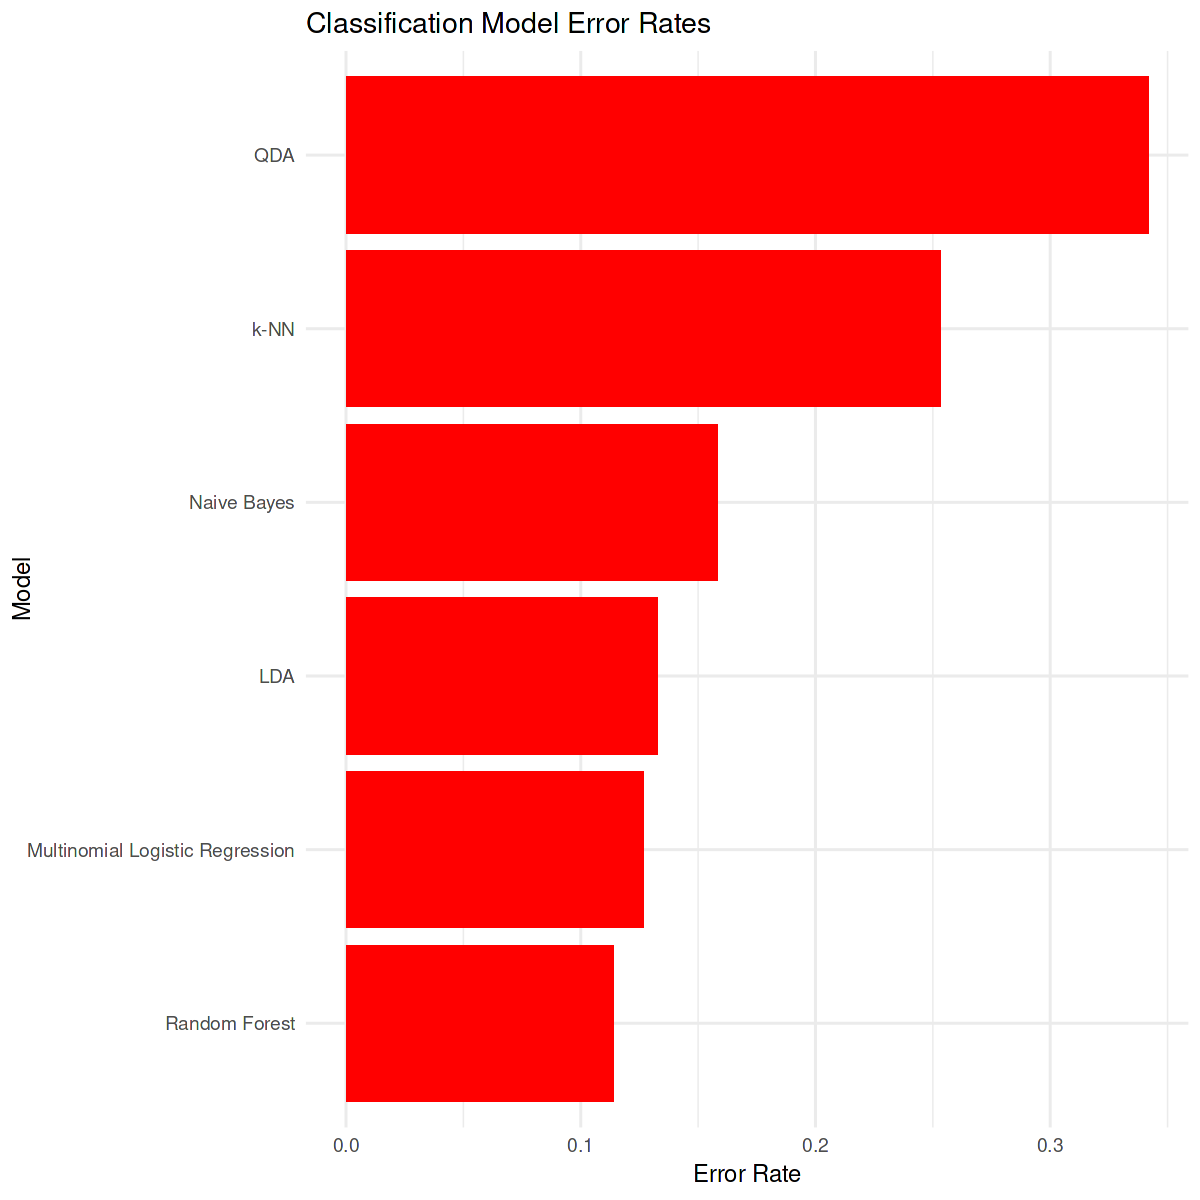

In [24]:
ggplot(results, aes(x = reorder(Model, ErrorRate), y = ErrorRate)) +
  geom_bar(stat = "identity", fill = "red") +
  coord_flip() + # Flip axes
  labs(
    title = "Classification Model Error Rates",
    x = "Model",
    y = "Error Rate"
  ) +
  theme_minimal(base_size = 14)

## 9. Perform the model on the test set

In [25]:
# Importing the test_features.csv and perform all those adjustments on it too.
test_feat <- read.csv("/kaggle/input/data-analytics-exam/test_features.csv")
test_feat$V5 <- as.numeric(gsub('"', '', test_feat$V5))
test_feat <- subset(test_feat, select = -c(V2, V4))

# Split IDs
test_ids <- test_feat$ID

pred_lda_final <- predict(model_lda, subset(test_feat, select = -ID))
pred_rf_final <- predict(model_rf,  subset(test_feat, select = -ID))
pred_log_final <- predict(model_log, subset(test_feat, select = -ID))

data.frame(
  ID = test_ids,
  LDA = pred_lda_final,
  RF = pred_rf_final,
  LOG = pred_log_final
)

ID,LDA,RF,LOG
<int>,<fct>,<fct>,<fct>
18,C,C,C
23,A,A,A
26,C,C,C
32,A,A,A
38,B,C,B
46,A,A,A
47,C,C,C
50,B,B,B
53,B,B,B


Although Random Forest was more accurate, I chose Multinomial Logistic Regression because it is easier to understand and interpret. This model clearly shows how each feature influences the outcome, making it better for explaining results. It is also simpler and faster to train, requiring less computational effort. Overall, it offers a good balance between performance and interpretability.

## 10. Export the final output

In [26]:
results_export <- data.frame(ID = test_ids, Prediction = pred_log_final)
write.csv(results_export, "79182_predictions.csv", row.names = FALSE)

## 11. Test Evaluations

In [27]:
# Load predictions from your model
true_labels <- read.csv("/kaggle/input/data-analytics-exam/test_labels.csv")
student_pred <- read.csv("79182_predictions.csv")
merged <- merge(true_labels, student_pred, by = "ID")
merged$target <- factor(merged$target)
merged$Prediction <- factor(merged$Prediction, levels = levels(merged$target))

# Confusion Matrix and accuracy
conf_mat <- confusionMatrix(merged$Prediction, merged$target)
print(conf_mat)
conf_mat$overall[1]
acc <- conf_mat$overall[1]
cat("Accuracy:", round(acc, 4), "\n")

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C
         A 72  1  0
         B  0 46 11
         C  0 15 55

Overall Statistics
                                          
               Accuracy : 0.865           
                 95% CI : (0.8097, 0.9091)
    No Information Rate : 0.36            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7969          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            1.0000   0.7419   0.8333
Specificity            0.9922   0.9203   0.8881
Pos Pred Value         0.9863   0.8070   0.7857
Neg Pred Value         1.0000   0.8881   0.9154
Prevalence             0.3600   0.3100   0.3300
Detection Rate         0.3600   0.2300   0.2750
Detection Prevalence   0.3650   0.2850   0.3500
Balanced Accuracy      0.9961   0.8311   0.8607


Accuracy 
   0.865

Accuracy: 0.865 


---